In [2]:
%matplotlib inline 
%load_ext google.colab.data_table
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
!pip install neptune-client
import neptune.new as neptune

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 318 kB 7.6 MB/s 
     |████████████████████████████████| 829 kB 47.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 181 kB 59.9 MB/s 
     |████████████████████████████████| 132 kB 73.0 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 8.9 MB 55.0 MB/s 
     |████████████████████████████████| 138 kB 74.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 127 kB 77.2 MB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
     |████████████████████████████████| 130 kB 72.8 MB/s 
     |████████████████████████████████| 80 kB 11.4 MB/s 
     |████████████████████████████████| 80 kB 8.5 MB/s 
     |████████████████████████████████| 72 kB

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
df1 = pd.read_csv('/content/gdrive/MyDrive/miRNA/IMTdatabase.csv',sep=';' , encoding='latin-1')

Mounted at /content/gdrive


In [4]:
import neptune.new as neptune
run = neptune.init(
    project="ryamaguti/IMT-FCM",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIzYTE5NmYzMC04ZThiLTQ4NzktODQyNC0yZWEwYTdlMjA3YWIifQ==",
)  # your credentials

https://app.neptune.ai/ryamaguti/IMT-FCM/e/IMT-136
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [5]:
df1.head()

,HC,Status,Idade,Sexo,PAS,PAD,FC,Septo,PP,DDFVE,...,betabloq,BCC,Medicação,Antaaldost,agoalfacentral,agoalfaper,vasodilat,statinas,AAS,obesidade
0,10731748,1.0,67,2,113,65,63.0,8.0,8.0,41.0,...,1,0,1,0,0.0,0,0.0,0,0,1
1,12181430,1.0,51,1,110,65,61.0,9.0,9.0,49.0,...,0,0,0,0,0.0,0,0.0,1,1,1
2,2873990,1.0,58,2,130,91,66.0,10.0,9.0,38.0,...,0,0,1,0,0.0,0,0.0,0,0,1
3,12248343,1.0,24,1,137,77,62.0,10.0,10.0,53.0,...,1,1,1,0,0.0,0,0.0,0,0,1
4,10968107,2.0,74,2,170,80,75.0,11.0,12.0,43.0,...,1,1,1,0,0.0,0,NaN,1,1,1


In [6]:
df1.describe()

,HC,Status,Idade,Sexo,PAS,PAD,FC,Septo,PP,DDFVE,...,betabloq,BCC,Medicação,Antaaldost,agoalfacentral,agoalfaper,vasodilat,statinas,AAS,obesidade
count,1.780000e+02,175.000000,178.000000,178.000000,178.000000,178.000000,177.000000,176.000000,176.000000,176.000000,...,178.000000,178.000000,178.000000,178.000000,177.000000,178.000000,177.000000,178.000000,178.000000,178.000000
mean,8.536820e+06,1.588571,60.556180,1.567416,151.719101,84.179775,67.016949,11.005682,10.965909,49.346591,...,0.612360,0.612360,0.971910,0.258427,0.124294,0.044944,0.231638,0.713483,0.460674,1.449438
std,3.519348e+06,0.493505,10.737741,0.496832,25.502404,15.753799,11.795836,1.748459,1.530258,5.757905,...,0.488586,0.488586,0.165696,0.439005,0.330852,0.207765,0.423076,0.453409,0.499857,0.498840
min,3.981280e+05,1.000000,24.000000,1.000000,90.000000,57.000000,37.000000,7.000000,7.000000,38.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.125074e+06,1.000000,54.000000,1.000000,136.000000,72.000000,59.000000,10.000000,10.000000,46.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.178570e+06,2.000000,61.000000,2.000000,150.000000,82.000000,66.000000,11.000000,11.000000,49.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.160243e+07,2.000000,68.000000,2.000000,166.500000,92.750000,72.000000,12.000000,12.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,1.306224e+07,2.000000,85.000000,2.000000,245.000000,142.000000,99.000000,20.000000,17.000000,79.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


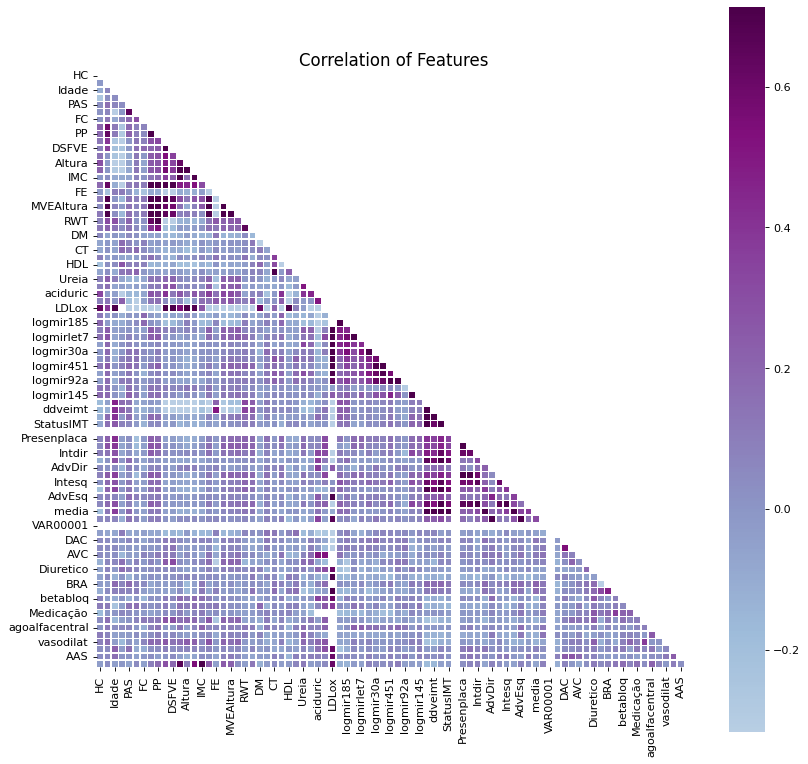

In [7]:
corr = df1.corr()
fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', robust=True, center=0,
            square=True, linewidths=.5)
plt.title('Correlation of Features', fontsize=15)
plt.show()

In [8]:
variables = ['StatusIMT','logmirlet7','logmir145']
xvr = ['logmirlet7','logmir145']
yvr = 'StatusIMT'

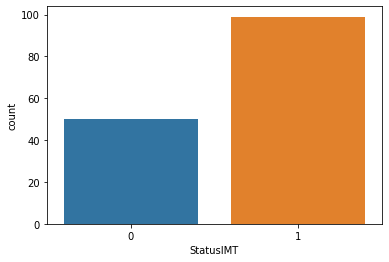

In [9]:
from sklearn.preprocessing import OrdinalEncoder
selected_columns = df1[variables]

				
#selected_columns = selected_columns.replace(np.nan,0)
selected_columns = selected_columns.dropna(axis=0)
selected_columns = selected_columns.sample(frac = 1)
#selected_columns = selected_columns.drop(np.random.choice(selected_columns.index[selected_columns['StatusIMT'].eq(1)], 75))

selected_columns['StatusIMT'] = selected_columns['StatusIMT'].replace(2,0)
X = selected_columns[xvr]
y = selected_columns[yvr]

encoder = OrdinalEncoder()

sns.countplot(x = 'StatusIMT', data=selected_columns)

In [10]:
ind = len(xvr)

In [11]:
X = selected_columns[xvr]
y = selected_columns['StatusIMT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [12]:
#train_split = int(len(X)*0.80)
#valid_split = int(len(X)*0.15) + train_split
#test_split = int(len(X)*0.20)  + valid_split



#x_train = X[0:train_split]
#x_valid = X[train_split+1:valid_split]
#x_test  = X[train_split+1: len(X)]

#y_train = y[0:train_split]
#y_valid = y[train_split+1:valid_split]
#y_test  = y[train_split+1: len(X)]
#len(y_test)
df_train = pd.concat([X_train,y_train],axis=1)
#df_valid = x_valid
df_test = pd.concat([X_test,y_test],axis=1)




from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#x_valid = scaler.fit_transform(x_valid)
X_test = scaler.fit_transform(X_test)


In [13]:
df_train

,logmirlet7,logmir145,StatusIMT
55,-1.9700,-1.6250,1
56,-5.7150,-2.2750,1
62,-5.0550,2.2700,0
73,-5.7450,-2.3900,0
79,-4.4950,2.0800,0
...,...,...,...
51,-5.2300,0.3950,1
143,-5.3000,-2.8350,1
47,-4.9375,-2.5675,1
120,-5.1100,-2.1500,1


In [14]:
lr = 1e-4#@param {type: "number"}
bs = 16#@param {type: "integer"}
max_epochs = 500#@param {type: "integer"}
hidden_layer = 150
params = {
    'lr': lr,
    'bs': bs,
    'max_epochs': max_epochs,
}

In [15]:
from torch.utils.data import Dataset, DataLoader

class dataSet(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data.to_numpy()
        self.y_data = self.y_data.astype(np.float)
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [16]:
import random
import torch
import torch.nn.functional as F
import numpy as np

random.seed(123)
np.random.seed(123)
torch.manual_seed(123)

train_dataset = dataSet(torch.FloatTensor(X_train),
                       y_train)
train_dataloader = DataLoader(train_dataset,  batch_size=params['bs'], shuffle=True)

#valid_dataset = dataSet(x_valid,y_valid)
#valid_dataloader = DataLoader(valid_dataset,  batch_size=params['bs'], shuffle=False)

test_dataset = TestData(torch.FloatTensor(X_test))
test_dataloader = DataLoader(test_dataset,  batch_size=params['bs'], shuffle=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [17]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(ind, 128) 
        self.layer_2 = nn.Linear(128, 64)
        self.layer_3 = nn.Linear(64, 512)
        self.layer_4 = nn.Linear(512, 20)
        #self.conv1d = nn.Conv1d(8, 33, 3, stride=2)
        self.layer_out = nn.Linear(20, 1)
       
        
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.batchnorm3 = nn.BatchNorm1d(512)
        self.batchnorm4 = nn.BatchNorm1d(20)
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout2(x)
        x = self.tanh(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.tanh(self.layer_4(x))
        x = self.batchnorm4(x)
        #x = self.conv1d(x)
        x = self.layer_out(x)
        
        return x

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [19]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=params['lr'])

BinaryClassification(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=512, bias=True)
  (layer_4): Linear(in_features=512, out_features=20, bias=True)
  (layer_out): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
  (tanh): Tanh()
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [20]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [21]:
model.train()
for e in range(1, params['max_epochs']+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        model.eval()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    run['train/Loss'].log(epoch_loss/len(train_dataloader))
    run['train/Acc'].log(epoch_acc/len(train_dataloader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_dataloader):.5f} | Acc: {epoch_acc/len(train_dataloader):.3f}')
run.stop()

Epoch 001: | Loss: 0.69888 | Acc: 44.375
Epoch 002: | Loss: 0.66993 | Acc: 68.875
Epoch 003: | Loss: 0.64544 | Acc: 70.125
Epoch 004: | Loss: 0.63322 | Acc: 68.750
Epoch 005: | Loss: 0.63388 | Acc: 67.125
Epoch 006: | Loss: 0.62486 | Acc: 68.000
Epoch 007: | Loss: 0.61993 | Acc: 68.000
Epoch 008: | Loss: 0.61882 | Acc: 68.000
Epoch 009: | Loss: 0.60362 | Acc: 70.000
Epoch 010: | Loss: 0.61083 | Acc: 69.000
Epoch 011: | Loss: 0.59944 | Acc: 70.000
Epoch 012: | Loss: 0.61365 | Acc: 68.125
Epoch 013: | Loss: 0.61395 | Acc: 68.000
Epoch 014: | Loss: 0.60067 | Acc: 69.000
Epoch 015: | Loss: 0.60327 | Acc: 69.000
Epoch 016: | Loss: 0.61544 | Acc: 67.125
Epoch 017: | Loss: 0.59866 | Acc: 69.000
Epoch 018: | Loss: 0.58633 | Acc: 70.750
Epoch 019: | Loss: 0.58160 | Acc: 71.000
Epoch 020: | Loss: 0.59910 | Acc: 68.875
Epoch 021: | Loss: 0.59312 | Acc: 69.125
Epoch 022: | Loss: 0.58907 | Acc: 70.125
Epoch 023: | Loss: 0.61627 | Acc: 66.000
Epoch 024: | Loss: 0.59576 | Acc: 69.000
Epoch 025: | Los

In [22]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_dataloader:
        #print(X_batch)
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        #print(y_pred_list)
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


In [23]:
import itertools
y_pred_list = list(itertools.chain(*y_pred_list))

In [24]:
len(y_pred_list)

30

In [25]:
len(y_test)

30

In [26]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_list)*100,"%")

Accuracy:  60.0 %


In [27]:
new = df1.sample(n=1)
print(new['StatusIMT'])
new = new[xvr]
new

138    1
Name: StatusIMT, dtype: int64


,logmirlet7,logmir145
138,-4.1175,-0.8525


In [28]:
new = scaler.transform(new)
new

array([[0.15864818, 0.11243218]])

In [29]:
predit = model( torch.tensor(new,dtype=torch.float).to(device))
pred = torch.round(torch.sigmoid(predit))
pred

tensor([[1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [30]:
result = pd.DataFrame({'Predicted Status IMT':y_pred_list})

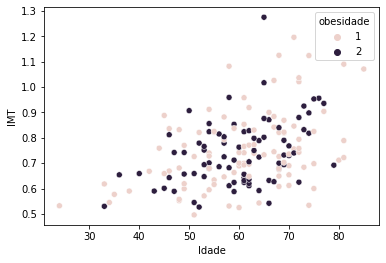

In [31]:
sns.scatterplot(data = df1, x = "Idade", y = "IMT", hue='obesidade')

plt.show()

In [32]:

df_test.reset_index(drop=True, inplace=True)
result.reset_index(drop=True, inplace=True)
newdf = pd.concat([df_test,result],axis=1)
newdf

,logmirlet7,logmir145,StatusIMT,Predicted Status IMT
0,-3.5425,-1.7175,1,0.0
1,-5.8450,-2.9800,1,0.0
2,-3.3775,-0.4975,1,1.0
3,-5.4900,2.8236,0,0.0
4,-5.1700,-3.2850,1,1.0
5,-4.9975,2.3373,0,0.0
6,0.3200,-1.3600,0,1.0
7,-6.4925,-2.0125,1,1.0
8,-5.6775,-2.9375,1,0.0
9,-4.1175,-0.8525,1,1.0


In [33]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.63      0.71      0.67        17

    accuracy                           0.60        30
   macro avg       0.59      0.58      0.58        30
weighted avg       0.59      0.60      0.59        30



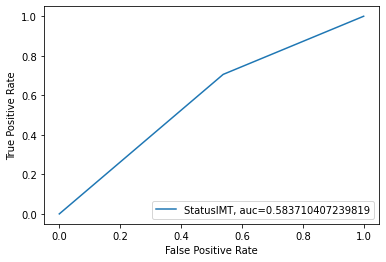

In [34]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_list)
auc = metrics.roc_auc_score(y_test, y_pred_list)
plt.plot(fpr,tpr,label="StatusIMT, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [35]:
clf = LogisticRegression(penalty='l2', C=0.3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100,"%")


Accuracy:  56.666666666666664 %


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


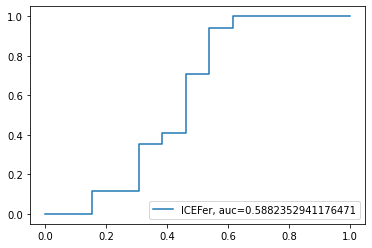

In [37]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ICEFer, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Figure size 432x288 with 0 Axes>

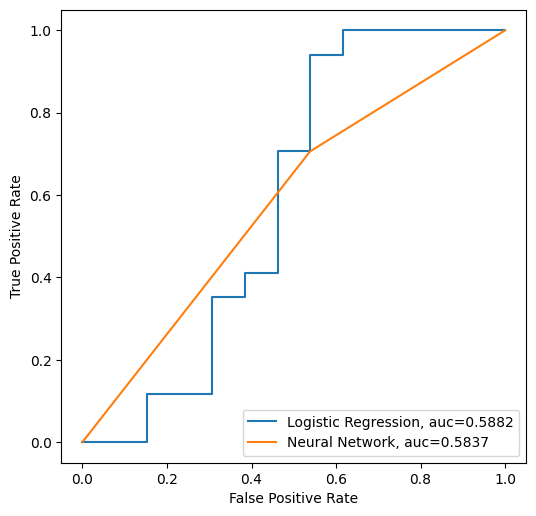

In [38]:
plt.figure(0).clf()
plt.figure(figsize=(6, 6), dpi=100)
fpr, tpr, thresh =  metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(round(auc,4)))


fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_list)
auc = metrics.roc_auc_score(y_test, y_pred_list)
plt.plot(fpr,tpr,label="Neural Network, auc="+str(round(auc,4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0)